## Sports data is dynamic, but nba_api has been constantly updated and helps to request updated data about each specific team from nba.com.

## Question: Has Warriors played better at home or away?





### 1) Install nba_api through command: pip install nba_api and Import the module teams. 

In [22]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from nba_api.stats.static import teams

In [24]:
# The method get_teams returns a list of dictionaries.
nba_teams=teams.get_teams()
print(type(nba_teams))
print ('Number of dictionaries:', len(nba_teams))

# let's print the first 5 dictionaries in the list.
print(nba_teams[:3])     

<class 'list'>
Number of dictionaries: 30
[{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Atlanta', 'year_founded': 1949}, {'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}, {'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}]


In [25]:
column_names = list(nba_teams[0].keys())

There is a list of dictionaries. Each dictionary contains 7 pairs of key-value.

### 2) Convert the list of dictionaries into a table (as a dictionary), in away that each row contains the information for a different team.

In [26]:
df_team = pd.DataFrame(nba_teams, columns= column_names )

In [27]:
df_team.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


### 3) Find the Warriors'id.

In [35]:
# Find team with nickname of Warriors.
df_warriors = df_team[df_team.nickname == 'Warriors']
id_warriors = df_warriors.id.values.item()
print('Warriors id:',id_warriors)

Warriors id: 1610612744


### 4) Send an HTTP request to nba.com to take the info about all the games the warriors played with. The requested information is provided and is transmitted via an HTTP response. 

To make a request for a specific team, team's unique id is required which is stored locally in the API (no need for Jason file). 

In [37]:
# Import Leaguegamefinder function which calls an API. The parameter 'team_id_nullable' is the warriors'unique id. 
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder (team_id_nullable= id_warriors)
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900967,2020-03-10,GSW vs. LAC,L,239,107,...,0.815,4.0,31.0,35.0,25,3,0,9,17,-24.0
1,22019,1610612744,GSW,Golden State Warriors,0021900944,2020-03-07,GSW vs. PHI,W,240,118,...,0.750,7.0,28.0,35.0,30,4,2,7,19,4.0
2,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
3,22019,1610612744,GSW,Golden State Warriors,0021900913,2020-03-03,GSW @ DEN,W,239,116,...,0.636,5.0,30.0,35.0,31,8,3,11,23,16.0
4,22019,1610612744,GSW,Golden State Warriors,0021900901,2020-03-01,GSW vs. WAS,L,239,110,...,0.708,18.0,34.0,52.0,25,7,7,21,24,-14.0


### 5) Create two DF, one for the games where the warriors faced the raptors at home, and the second for away games. 

The column MATCHUP contains name of the team that the warriors were playing vs. whether it is a home game or an away game(@ symbol). 'GSW' stands for Golden State Warriors team and 'TOR' means Toronto Raptors. 


In [44]:
games_home=games[games["MATCHUP"]=="GSW vs. TOR"]
games_away=games[games["MATCHUP"]=="GSW @ TOR"]
games_away.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
79,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5,7,15,22,1.0
82,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7,5,15,26,5.0
83,42018,1610612744,GSW,Golden State Warriors,0041800401,2019-05-30,GSW @ TOR,L,239,109,...,0.935,9.0,29.0,38.0,29,6,2,16,27,-9.0
159,22018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6,5,14,22,-3.0
254,22017,1610612744,GSW,Golden State Warriors,0021700631,2018-01-13,GSW @ TOR,W,239,127,...,0.857,3.0,27.0,30.0,28,4,3,6,20,2.0


### 6) Plot out the plus_minus column for both DataFrames. 

The plus_minus column contains information on the score. 

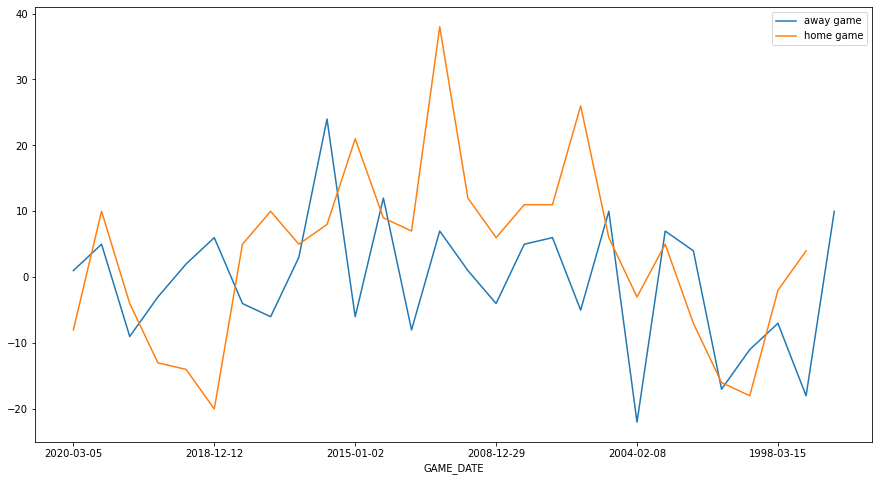

In [67]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,8))
games_away.plot(x= "GAME_DATE", y= "PLUS_MINUS", ax= ax)
games_home.plot(x= "GAME_DATE", y= "PLUS_MINUS", ax= ax)
ax.legend(["away game","home game"])
plt.show()

# Warriors has often played better at home.